In [1]:
import pandas as pd
import json
import os
import re

In [2]:
pickle_files = ["./data/gpt-4o-detailed_1.pkl"]

dfs = [pd.read_pickle(file) for file in pickle_files]
df1 = pd.concat(dfs)

df1["prompt"] = "How many times do the blue and red line plots cross each other?"


pickle_files = ["./data/gpt-4o-detailed_2.pkl"]

dfs = [pd.read_pickle(file) for file in pickle_files]
df2 = pd.concat(dfs)

df2["prompt"] = "How many times do the blue and red lines intersect?"

In [3]:
df = pd.concat([df1, df2])

In [4]:
df

,image_path,num_points,num_intersections,line_colors,line_thickness,coordinates,model_output_raw,extracted_number,is_correct,Model,prompt
0,image_0_thickness_2.png,3,0,"[red, blue]",2,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
1,image_0_thickness_3.png,3,0,"[red, blue]",3,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other o...,1,False,gpt-4o,How many times do the blue and red line plots ...
2,image_0_thickness_4.png,3,0,"[red, blue]",4,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
3,image_1_thickness_2.png,3,1,"[red, blue]",2,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
4,image_1_thickness_3.png,3,1,"[red, blue]",3,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,How many times do the blue and red line plots ...
...,...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect at two points.,2,True,gpt-4o,How many times do the blue and red lines inter...
146,image_48_thickness_4.png,3,2,"[red, blue]",4,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect three times i...,3,False,gpt-4o,How many times do the blue and red lines inter...
147,image_49_thickness_2.png,3,2,"[red, blue]",2,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect at 3 points.,3,False,gpt-4o,How many times do the blue and red lines inter...
148,image_49_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect at two points.,2,True,gpt-4o,How many times do the blue and red lines inter...


In [5]:
df.groupby(["Model", "prompt"]).count()

image_path  \
Model  prompt                                                           
gpt-4o How many times do the blue and red line plots c...         150   
       How many times do the blue and red lines inters...         150   

                                                           num_points  \
Model  prompt                                                           
gpt-4o How many times do the blue and red line plots c...         150   
       How many times do the blue and red lines inters...         150   

                                                           num_intersections  \
Model  prompt                                                                  
gpt-4o How many times do the blue and red line plots c...                150   
       How many times do the blue and red lines inters...                150   

                                                           line_colors  \
Model  prompt                                                            
gpt-4o How many times do the blue and red line plots c...          150   
       How many times do the blue and red lines inters...          150   

                                                           line_thickness  \
Model  prompt                                                               
gpt-4o How many times do the blue and red line plots c...             150   
       How many times do the blue and red lines inters...             150   

                                                           coordinates  \
Model  prompt                                                            
gpt-4o How many times do the blue and red line plots c...          150   
       How many times do the blue and red lines inters...          150   

                                                           model_output_raw  \
Model  prompt                                                                 
gpt-4o How many times do the blue and red line plots c...               150   
       How many times do the blue and red lines inters...               150   

                                                           extracted_number  \
Model  prompt                                                                 
gpt-4o How many times do the blue and red line plots c...               150   
       How many times do the blue and red lines inters...               150   

                                                           is_correct  
Model  prompt                                                          
gpt-4o How many times do the blue and red line plots c...         150  
       How many times do the blue and red lines inters...         150

In [6]:
# Filter the dataframe for the specific prompt
df_prompt2 = df[df["prompt"] == "How many times do the blue and red lines intersect?"]

# Get all unique image_path values
all_images = set(df_prompt2["image_path"])

# Get image_path values for gpt-4o
gpt4o_images = set(df_prompt2[df_prompt2["Model"] == "gpt-4o"]["image_path"])

# Find the missing image
missing_image = all_images - gpt4o_images

if missing_image:
    print(f"The missing image for gpt-4o is: {missing_image.pop()}")
else:
    print("No missing image found.")

No missing image found.


In [7]:
accuracy_per_model_and_word = df.groupby(["Model"])["is_correct"].mean()

# Convert the accuracy to percentage and print the result
accuracy_per_model_and_word = accuracy_per_model_and_word * 100
# round 2 decimal places
accuracy_per_model_and_word = accuracy_per_model_and_word.round(2)

accuracy_per_model_and_word.T.reset_index()

,Model,is_correct
0,gpt-4o,48.67


In [8]:
# ... existing code ...


# Function to extract coordinates
def extract_coordinates(coord_dict, line_name, point_index):
    return (
        coord_dict[line_name][point_index]
        if coord_dict and line_name in coord_dict
        else [None, None]
    )


# Expand the coordinates
for line in ["line1", "line2"]:
    for i in range(3):  # Assuming always 3 points per line
        df[f"{line}_x{i+1}"] = df["coordinates"].apply(
            lambda x: extract_coordinates(x, line, i)[0]
        )
        df[f"{line}_y{i+1}"] = df["coordinates"].apply(
            lambda x: extract_coordinates(x, line, i)[1]
        )

# Drop the original 'coordinates' column if you no longer need it
# df = df.drop('coordinates', axis=1)

# Display the updated DataFrame
df

# ... existing code ...

,image_path,num_points,num_intersections,line_colors,line_thickness,coordinates,model_output_raw,extracted_number,is_correct,Model,...,line1_x2,line1_y2,line1_x3,line1_y3,line2_x1,line2_y1,line2_x2,line2_y2,line2_x3,line2_y3
0,image_0_thickness_2.png,3,0,"[red, blue]",2,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,3.745890,10.0,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838
1,image_0_thickness_3.png,3,0,"[red, blue]",3,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other o...,1,False,gpt-4o,...,5.0,3.745890,10.0,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838
2,image_0_thickness_4.png,3,0,"[red, blue]",4,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,3.745890,10.0,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838
3,image_1_thickness_2.png,3,1,"[red, blue]",2,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,7.990233,10.0,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627
4,image_1_thickness_3.png,3,1,"[red, blue]",3,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,5.0,7.990233,10.0,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect at two points.,2,True,gpt-4o,...,5.0,2.366107,10.0,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924
146,image_48_thickness_4.png,3,2,"[red, blue]",4,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect three times i...,3,False,gpt-4o,...,5.0,2.366107,10.0,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924
147,image_49_thickness_2.png,3,2,"[red, blue]",2,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect at 3 points.,3,False,gpt-4o,...,5.0,9.765808,10.0,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160
148,image_49_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect at two points.,2,True,gpt-4o,...,5.0,9.765808,10.0,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160


In [9]:
# ... existing code ...

import numpy as np


# Function to calculate Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)


# Calculate distances between corresponding points
for i in range(1, 4):  # For each of the 3 point pairs
    df[f"distance_point{i}"] = euclidean_distance(
        df[f"line1_x{i}"], df[f"line1_y{i}"], df[f"line2_x{i}"], df[f"line2_y{i}"]
    )

# Display the updated DataFrame
df

# ... existing code ...

,image_path,num_points,num_intersections,line_colors,line_thickness,coordinates,model_output_raw,extracted_number,is_correct,Model,...,line1_y3,line2_x1,line2_y1,line2_x2,line2_y2,line2_x3,line2_y3,distance_point1,distance_point2,distance_point3
0,image_0_thickness_2.png,3,0,"[red, blue]",2,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838,0.758582,4.382426,0.344827
1,image_0_thickness_3.png,3,0,"[red, blue]",3,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other o...,1,False,gpt-4o,...,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838,0.758582,4.382426,0.344827
2,image_0_thickness_4.png,3,0,"[red, blue]",4,"{'line1': [[0.0, 7.596981558052801], [5.0, 3.7...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,8.192011,0.0,8.355563,5.0,8.128316,10.0,8.536838,0.758582,4.382426,0.344827
3,image_1_thickness_2.png,3,1,"[red, blue]",2,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627,1.695002,4.184016,0.022757
4,image_1_thickness_3.png,3,1,"[red, blue]",3,"{'line1': [[0.0, 6.015752719221071], [5.0, 7.9...",The blue and red line plots cross each other t...,2,False,gpt-4o,...,0.505869,0.0,4.320751,5.0,3.806217,10.0,0.528627,1.695002,4.184016,0.022757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,image_48_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect at two points.,2,True,gpt-4o,...,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924,2.518126,6.808268,0.140852
146,image_48_thickness_4.png,3,2,"[red, blue]",4,"{'line1': [[0.0, 9.69080313319073], [5.0, 2.36...",The blue and red lines intersect three times i...,3,False,gpt-4o,...,2.331776,0.0,7.172678,5.0,9.174374,10.0,2.190924,2.518126,6.808268,0.140852
147,image_49_thickness_2.png,3,2,"[red, blue]",2,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect at 3 points.,3,False,gpt-4o,...,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160,1.117522,8.942296,3.628507
148,image_49_thickness_3.png,3,2,"[red, blue]",3,"{'line1': [[0.0, 4.201544340964238], [5.0, 9.7...",The blue and red lines intersect at two points.,2,True,gpt-4o,...,2.726653,0.0,5.319066,5.0,0.823513,10.0,6.355160,1.117522,8.942296,3.628507


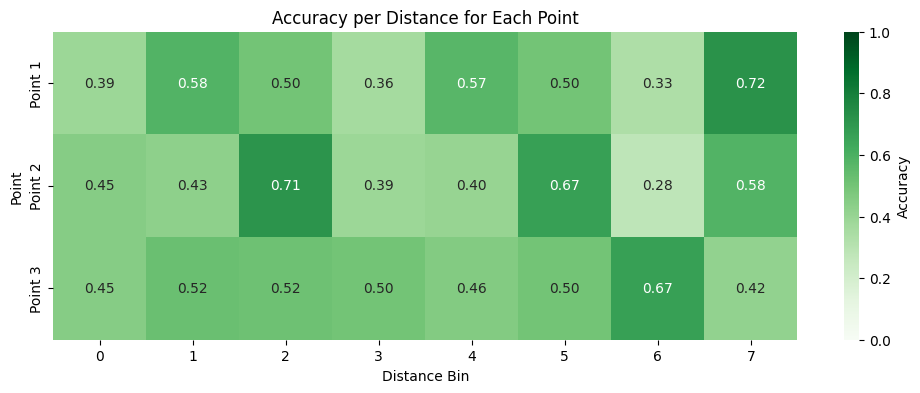

                0         1         2         3         4         5         6  \
Point 1  0.388889  0.583333  0.500000  0.361111  0.566667  0.500000  0.333333   
Point 2  0.450000  0.425926  0.714286  0.388889  0.404762  0.666667  0.277778   
Point 3  0.452381  0.523810  0.515152  0.500000  0.458333  0.500000  0.666667   

                7  
Point 1  0.722222  
Point 2  0.583333  
Point 3  0.416667  


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )

# Calculate accuracy for each bin and point
accuracy_data = []
for i in range(1, 4):
    point_accuracy = df.groupby(f"distance_point{i}_bin")["is_correct"].mean()
    accuracy_data.append(point_accuracy)

# Create a DataFrame from the accuracy data
accuracy_df = pd.DataFrame(accuracy_data, index=["Point 1", "Point 2", "Point 3"])

# Create the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(
    accuracy_df,
    annot=True,
    cmap="Greens",
    fmt=".2f",
    cbar_kws={"label": "Accuracy"},
    vmin=0,
    vmax=1,
)
plt.title("Accuracy per Distance for Each Point")
plt.xlabel("Distance Bin")
plt.ylabel("Point")
plt.show()

# Display the accuracy DataFrame
print(accuracy_df)

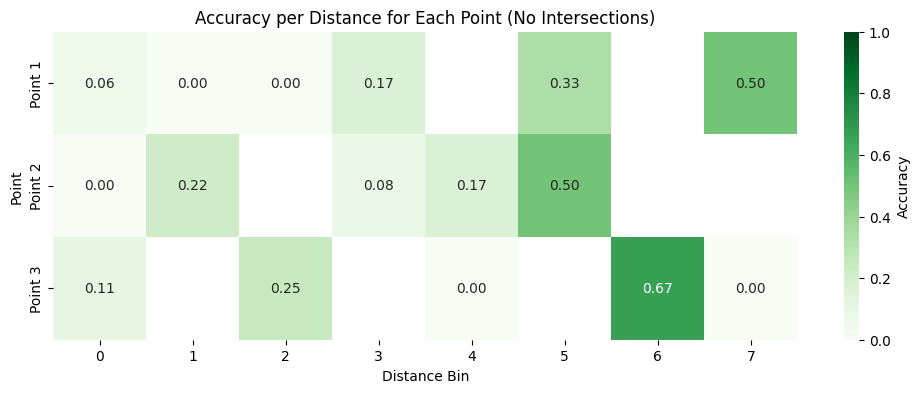

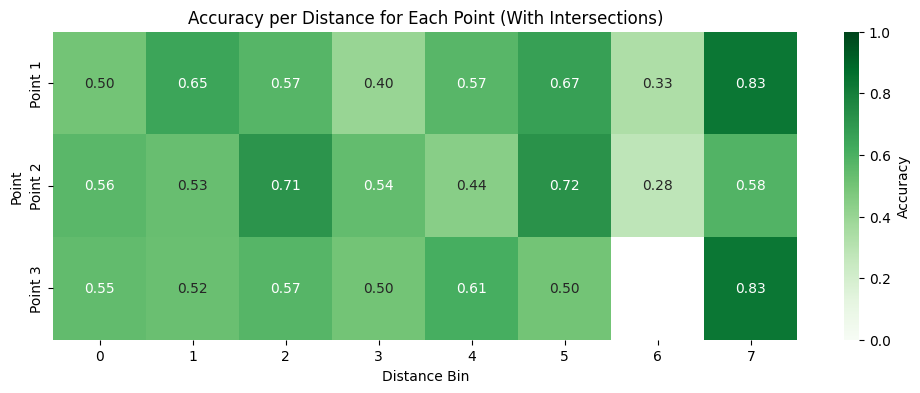

Accuracy for No Intersections:
                0         1     2         3         4         5         6    7
Point 1  0.055556  0.000000  0.00  0.166667       NaN  0.333333       NaN  0.5
Point 2  0.000000  0.222222   NaN  0.083333  0.166667  0.500000       NaN  NaN
Point 3  0.111111       NaN  0.25       NaN  0.000000       NaN  0.666667  0.0

Accuracy for Intersections:
                0         1         2         3         4         5         6  \
Point 1  0.500000  0.648148  0.571429  0.400000  0.566667  0.666667  0.333333   
Point 2  0.562500  0.527778  0.714286  0.541667  0.444444  0.722222  0.277778   
Point 3  0.545455  0.523810  0.574074  0.500000  0.611111  0.500000       NaN   

                7  
Point 1  0.833333  
Point 2  0.583333  
Point 3  0.833333  


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )


# Function to create heatmap
def create_heatmap(data, title):
    plt.figure(figsize=(12, 4))
    sns.heatmap(
        data,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        cbar_kws={"label": "Accuracy"},
        vmin=0,
        vmax=1,
    )
    plt.title(title)
    plt.xlabel("Distance Bin")
    plt.ylabel("Point")
    plt.show()


# Calculate accuracy for each bin and point for no intersections
no_intersections = df[df["num_intersections"] == 0]
accuracy_data_no_int = []
for i in range(1, 4):
    point_accuracy = no_intersections.groupby(f"distance_point{i}_bin")[
        "is_correct"
    ].mean()
    accuracy_data_no_int.append(point_accuracy)

accuracy_df_no_int = pd.DataFrame(
    accuracy_data_no_int, index=["Point 1", "Point 2", "Point 3"]
)

# Calculate accuracy for each bin and point for intersections
intersections = df[df["num_intersections"] > 0]
accuracy_data_int = []
for i in range(1, 4):
    point_accuracy = intersections.groupby(f"distance_point{i}_bin")[
        "is_correct"
    ].mean()
    accuracy_data_int.append(point_accuracy)

accuracy_df_int = pd.DataFrame(
    accuracy_data_int, index=["Point 1", "Point 2", "Point 3"]
)

# Create heatmaps
create_heatmap(
    accuracy_df_no_int, "Accuracy per Distance for Each Point (No Intersections)"
)
create_heatmap(
    accuracy_df_int, "Accuracy per Distance for Each Point (With Intersections)"
)

# Display the accuracy DataFrames
print("Accuracy for No Intersections:")
print(accuracy_df_no_int)
print("\nAccuracy for Intersections:")
print(accuracy_df_int)

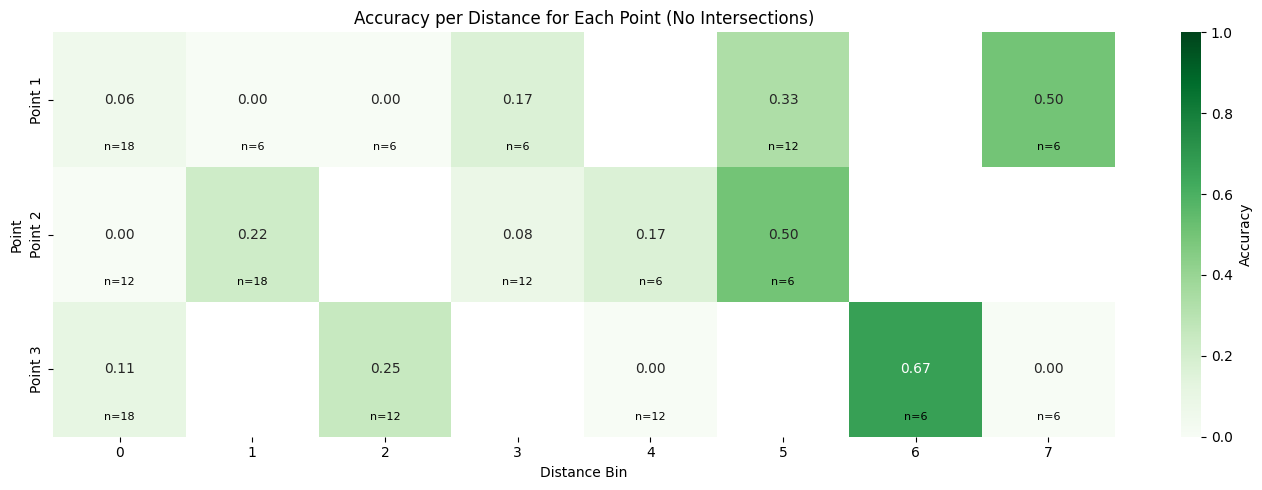

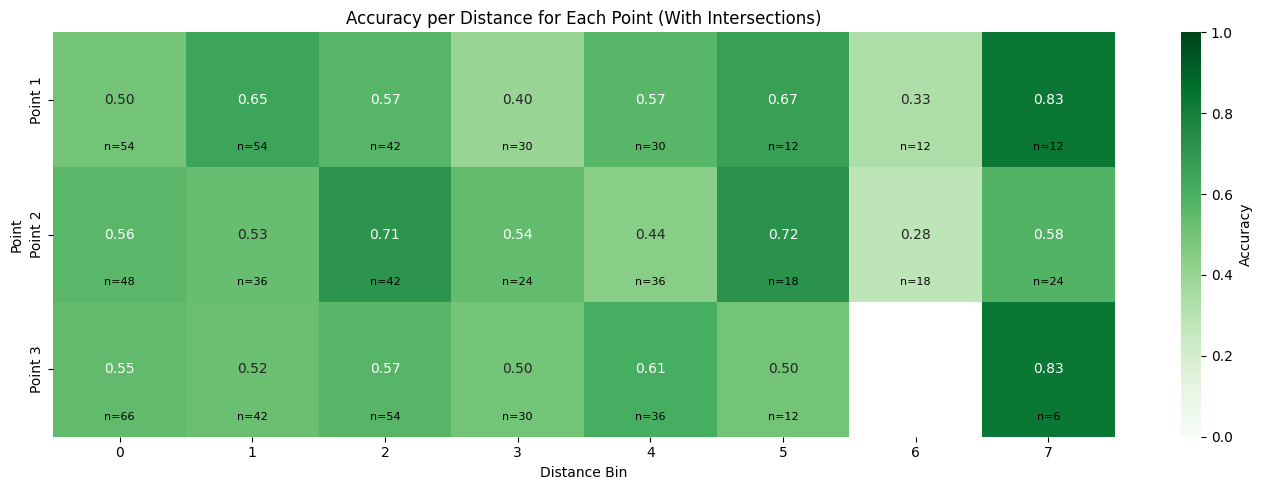

Accuracy for No Intersections:
                0         1     2         3         4         5         6    7
Point 1  0.055556  0.000000  0.00  0.166667       NaN  0.333333       NaN  0.5
Point 2  0.000000  0.222222   NaN  0.083333  0.166667  0.500000       NaN  NaN
Point 3  0.111111       NaN  0.25       NaN  0.000000       NaN  0.666667  0.0

Sample Counts for No Intersections:
          0   1   2   3   4   5  6  7
Point 1  18   6   6   6   0  12  0  6
Point 2  12  18   0  12   6   6  0  0
Point 3  18   0  12   0  12   0  6  6

Accuracy for Intersections:
                0         1         2         3         4         5         6  \
Point 1  0.500000  0.648148  0.571429  0.400000  0.566667  0.666667  0.333333   
Point 2  0.562500  0.527778  0.714286  0.541667  0.444444  0.722222  0.277778   
Point 3  0.545455  0.523810  0.574074  0.500000  0.611111  0.500000       NaN   

                7  
Point 1  0.833333  
Point 2  0.583333  
Point 3  0.833333  

Sample Counts for Intersectio

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )


# Function to create heatmap with sample counts
def create_heatmap(data, count_data, title):
    plt.figure(figsize=(14, 5))
    ax = sns.heatmap(
        data,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        cbar_kws={"label": "Accuracy"},
        vmin=0,
        vmax=1,
    )

    # Add sample counts below accuracy values
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if not np.isnan(data.iloc[i, j]):
                ax.text(
                    j + 0.5,
                    i + 0.85,
                    f"n={count_data.iloc[i, j]}",
                    ha="center",
                    va="center",
                    fontsize=8,
                )

    plt.title(title)
    plt.xlabel("Distance Bin")
    plt.ylabel("Point")
    plt.tight_layout()
    plt.show()


# Calculate accuracy and sample counts for each bin and point for no intersections
no_intersections = df[df["num_intersections"] == 0]
accuracy_data_no_int = []
count_data_no_int = []
for i in range(1, 4):
    point_accuracy = no_intersections.groupby(f"distance_point{i}_bin")[
        "is_correct"
    ].mean()
    point_count = no_intersections.groupby(f"distance_point{i}_bin").size()
    accuracy_data_no_int.append(point_accuracy)
    count_data_no_int.append(point_count)

accuracy_df_no_int = pd.DataFrame(
    accuracy_data_no_int, index=["Point 1", "Point 2", "Point 3"]
)
count_df_no_int = pd.DataFrame(
    count_data_no_int, index=["Point 1", "Point 2", "Point 3"]
)

# Calculate accuracy and sample counts for each bin and point for intersections
intersections = df[df["num_intersections"] > 0]
accuracy_data_int = []
count_data_int = []
for i in range(1, 4):
    point_accuracy = intersections.groupby(f"distance_point{i}_bin")[
        "is_correct"
    ].mean()
    point_count = intersections.groupby(f"distance_point{i}_bin").size()
    accuracy_data_int.append(point_accuracy)
    count_data_int.append(point_count)

accuracy_df_int = pd.DataFrame(
    accuracy_data_int, index=["Point 1", "Point 2", "Point 3"]
)
count_df_int = pd.DataFrame(count_data_int, index=["Point 1", "Point 2", "Point 3"])

# Create heatmaps
create_heatmap(
    accuracy_df_no_int,
    count_df_no_int,
    "Accuracy per Distance for Each Point (No Intersections)",
)
create_heatmap(
    accuracy_df_int,
    count_df_int,
    "Accuracy per Distance for Each Point (With Intersections)",
)

# Display the accuracy DataFrames
print("Accuracy for No Intersections:")
print(accuracy_df_no_int)
print("\nSample Counts for No Intersections:")
print(count_df_no_int)
print("\nAccuracy for Intersections:")
print(accuracy_df_int)
print("\nSample Counts for Intersections:")
print(count_df_int)

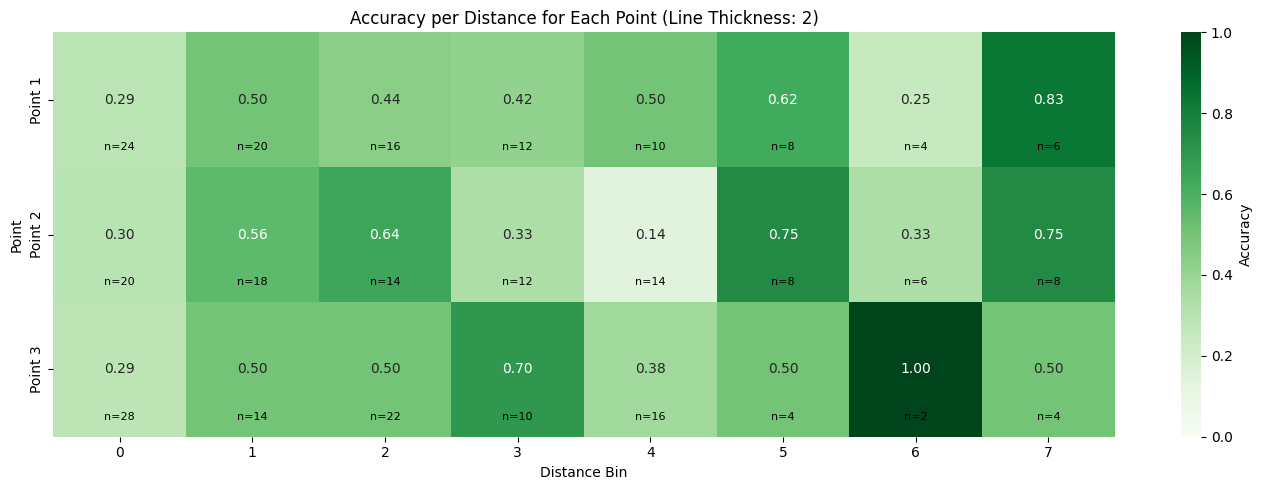


Accuracy for Line Thickness 2:
                0         1         2         3         4      5         6  \
Point 1  0.291667  0.500000  0.437500  0.416667  0.500000  0.625  0.250000   
Point 2  0.300000  0.555556  0.642857  0.333333  0.142857  0.750  0.333333   
Point 3  0.285714  0.500000  0.500000  0.700000  0.375000  0.500  1.000000   

                7  
Point 1  0.833333  
Point 2  0.750000  
Point 3  0.500000  

Sample Counts for Line Thickness 2:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




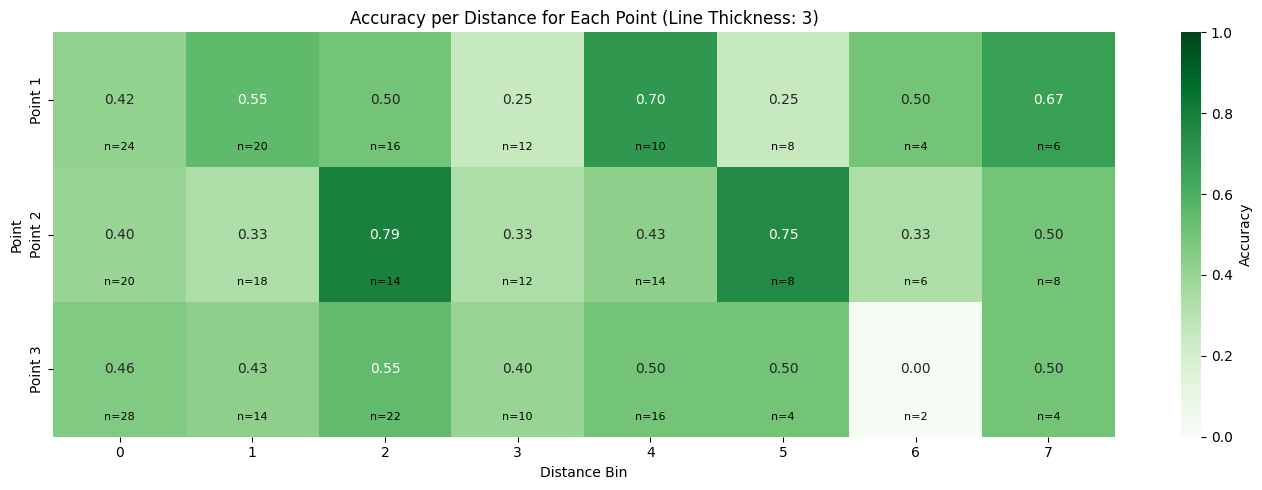


Accuracy for Line Thickness 3:
                0         1         2         3         4     5         6  \
Point 1  0.416667  0.550000  0.500000  0.250000  0.700000  0.25  0.500000   
Point 2  0.400000  0.333333  0.785714  0.333333  0.428571  0.75  0.333333   
Point 3  0.464286  0.428571  0.545455  0.400000  0.500000  0.50  0.000000   

                7  
Point 1  0.666667  
Point 2  0.500000  
Point 3  0.500000  

Sample Counts for Line Thickness 3:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




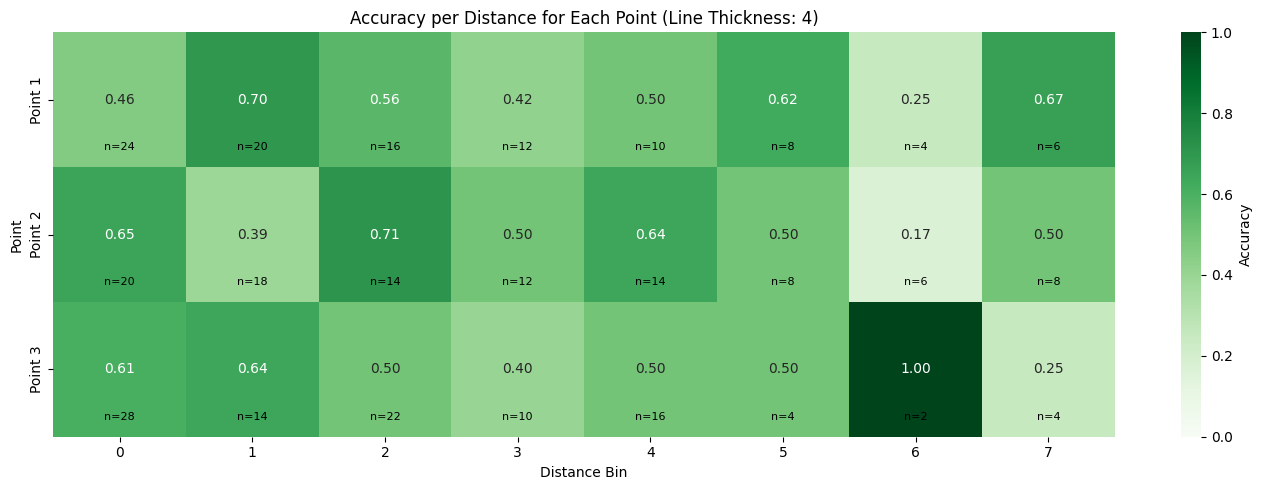


Accuracy for Line Thickness 4:
                0         1         2         3         4      5         6  \
Point 1  0.458333  0.700000  0.562500  0.416667  0.500000  0.625  0.250000   
Point 2  0.650000  0.388889  0.714286  0.500000  0.642857  0.500  0.166667   
Point 3  0.607143  0.642857  0.500000  0.400000  0.500000  0.500  1.000000   

                7  
Point 1  0.666667  
Point 2  0.500000  
Point 3  0.250000  

Sample Counts for Line Thickness 4:
          0   1   2   3   4  5  6  7
Point 1  24  20  16  12  10  8  4  6
Point 2  20  18  14  12  14  8  6  8
Point 3  28  14  22  10  16  4  2  4




In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create bins for distances
num_bins = 8
for i in range(1, 4):
    df[f"distance_point{i}_bin"] = pd.cut(
        df[f"distance_point{i}"], bins=num_bins, labels=range(num_bins)
    )


# Function to create heatmap with sample counts
def create_heatmap(data, count_data, title):
    plt.figure(figsize=(14, 5))
    ax = sns.heatmap(
        data,
        annot=True,
        cmap="Greens",
        fmt=".2f",
        cbar_kws={"label": "Accuracy"},
        vmin=0,
        vmax=1,
    )

    # Add sample counts below accuracy values
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if not np.isnan(data.iloc[i, j]):
                ax.text(
                    j + 0.5,
                    i + 0.85,
                    f"n={count_data.iloc[i, j]}",
                    ha="center",
                    va="center",
                    fontsize=8,
                )

    plt.title(title)
    plt.xlabel("Distance Bin")
    plt.ylabel("Point")
    plt.tight_layout()
    plt.show()


# Function to calculate accuracy and sample counts
def calculate_accuracy_and_counts(data):
    accuracy_data = []
    count_data = []
    for i in range(1, 4):
        point_accuracy = data.groupby(f"distance_point{i}_bin")["is_correct"].mean()
        point_count = data.groupby(f"distance_point{i}_bin").size()
        accuracy_data.append(point_accuracy)
        count_data.append(point_count)

    accuracy_df = pd.DataFrame(accuracy_data, index=["Point 1", "Point 2", "Point 3"])
    count_df = pd.DataFrame(count_data, index=["Point 1", "Point 2", "Point 3"])
    return accuracy_df, count_df


# Calculate and create heatmaps for each line thickness
for thickness in [2, 3, 4]:
    thickness_data = df[df["line_thickness"] == thickness]
    accuracy_df, count_df = calculate_accuracy_and_counts(thickness_data)

    create_heatmap(
        accuracy_df,
        count_df,
        f"Accuracy per Distance for Each Point (Line Thickness: {thickness})",
    )

    print(f"\nAccuracy for Line Thickness {thickness}:")
    print(accuracy_df)
    print(f"\nSample Counts for Line Thickness {thickness}:")
    print(count_df)
    print("\n" + "=" * 50 + "\n")

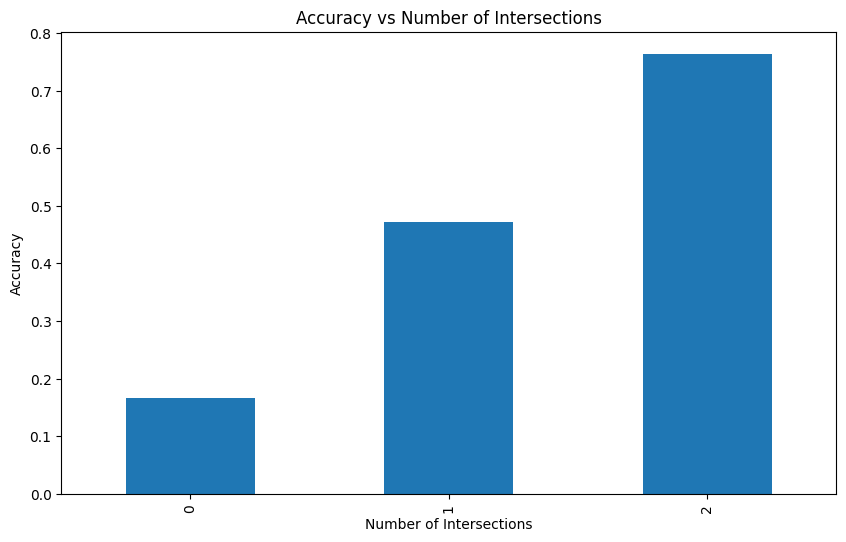

Accuracy by number of intersections:
num_intersections
0    0.166667
1    0.471264
2    0.763889
Name: is_correct, dtype: float64




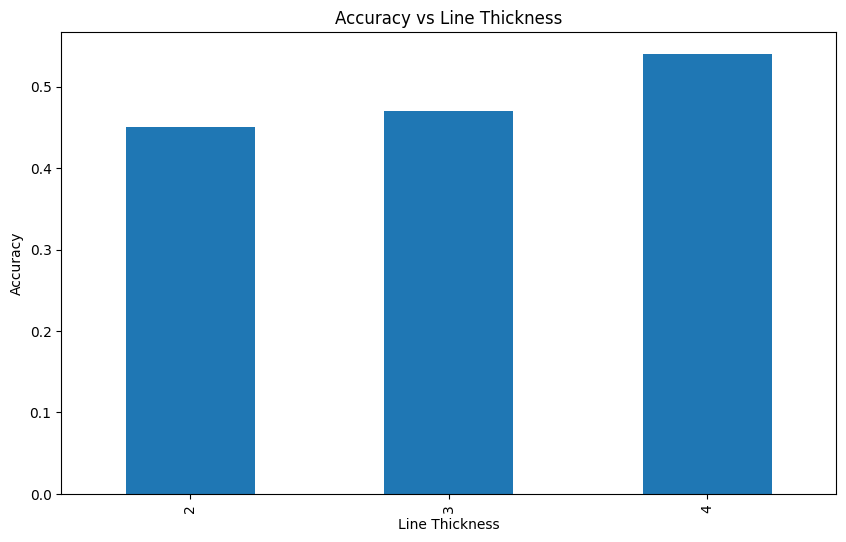

Accuracy by line thickness:
line_thickness
2    0.45
3    0.47
4    0.54
Name: is_correct, dtype: float64




RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

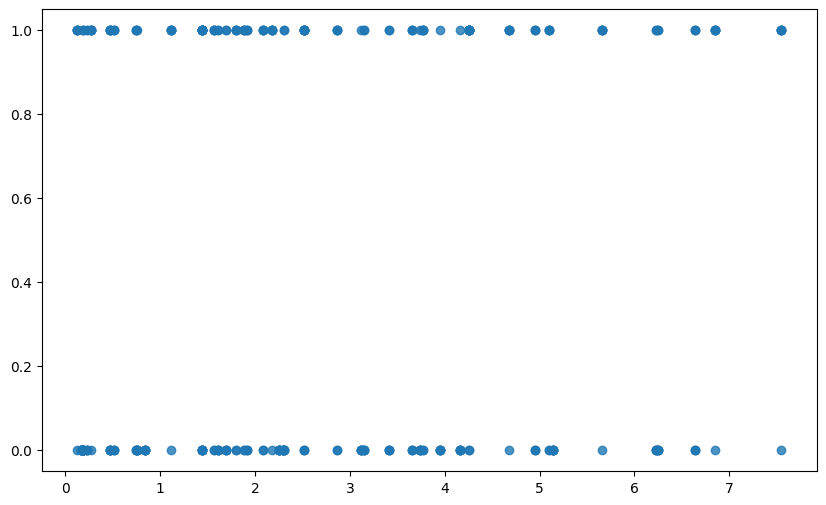

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relationship between number of intersections and accuracy
intersection_accuracy = df.groupby("num_intersections")["is_correct"].mean()
plt.figure(figsize=(10, 6))
intersection_accuracy.plot(kind="bar")
plt.title("Accuracy vs Number of Intersections")
plt.xlabel("Number of Intersections")
plt.ylabel("Accuracy")
plt.show()

print("Accuracy by number of intersections:")
print(intersection_accuracy)
print("\n" + "=" * 50 + "\n")

# 2. Relationship between line thickness and accuracy
thickness_accuracy = df.groupby("line_thickness")["is_correct"].mean()
plt.figure(figsize=(10, 6))
thickness_accuracy.plot(kind="bar")
plt.title("Accuracy vs Line Thickness")
plt.xlabel("Line Thickness")
plt.ylabel("Accuracy")
plt.show()

print("Accuracy by line thickness:")
print(thickness_accuracy)
print("\n" + "=" * 50 + "\n")

# 3. Relationship between point distances and accuracy
for i in range(1, 4):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=f"distance_point{i}", y="is_correct", data=df, logistic=True)
    plt.title(f"Accuracy vs Distance for Point {i}")
    plt.xlabel(f"Distance for Point {i}")
    plt.ylabel("Accuracy")
    plt.show()

# 4. Interaction between number of intersections and line thickness
interaction_accuracy = (
    df.groupby(["num_intersections", "line_thickness"])["is_correct"].mean().unstack()
)
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_accuracy, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy: Intersection Count vs Line Thickness")
plt.xlabel("Line Thickness")
plt.ylabel("Number of Intersections")
plt.show()

print("Accuracy by intersection count and line thickness:")
print(interaction_accuracy)
print("\n" + "=" * 50 + "\n")

# 5. Average distance between points for correct vs incorrect predictions
df["avg_distance"] = (
    df["distance_point1"] + df["distance_point2"] + df["distance_point3"]
) / 3
avg_distance_by_correctness = df.groupby("is_correct")["avg_distance"].mean()
print("Average distance between points for correct vs incorrect predictions:")
print(avg_distance_by_correctness)

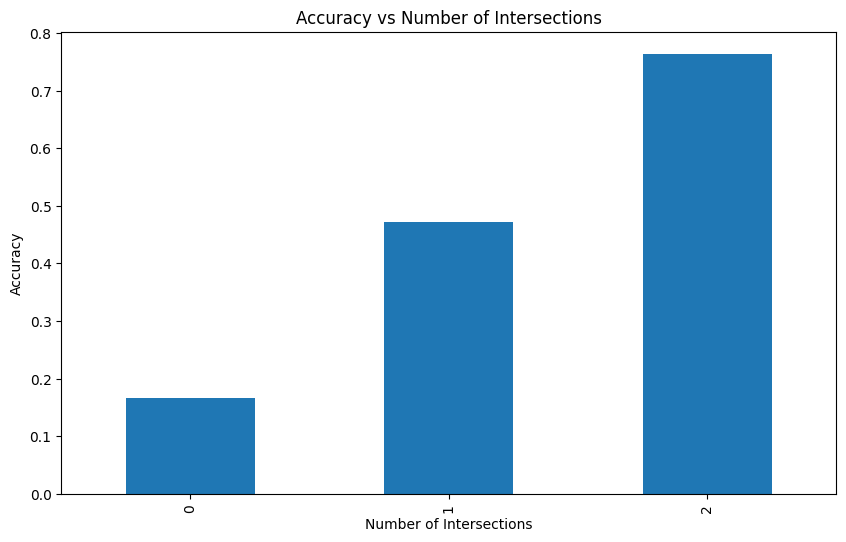

Accuracy by number of intersections:
num_intersections
0    0.166667
1    0.471264
2    0.763889
Name: is_correct, dtype: float64




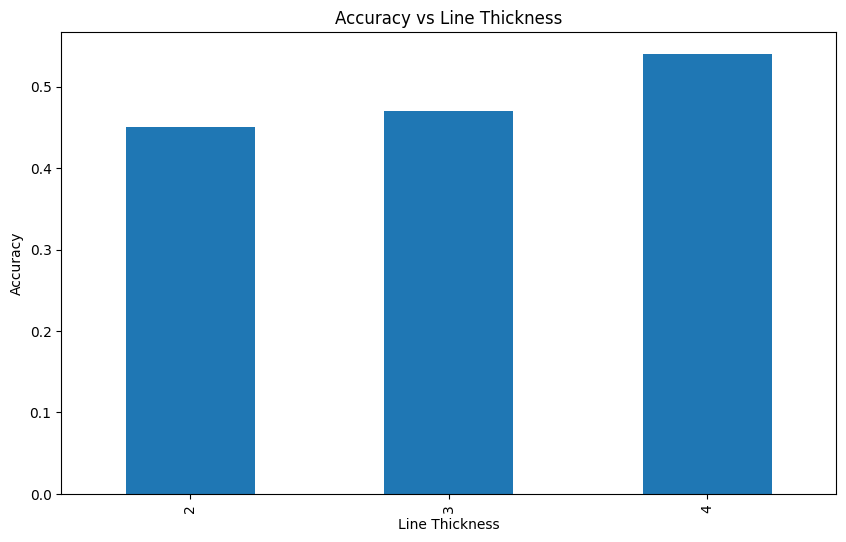

Accuracy by line thickness:
line_thickness
2    0.45
3    0.47
4    0.54
Name: is_correct, dtype: float64




RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

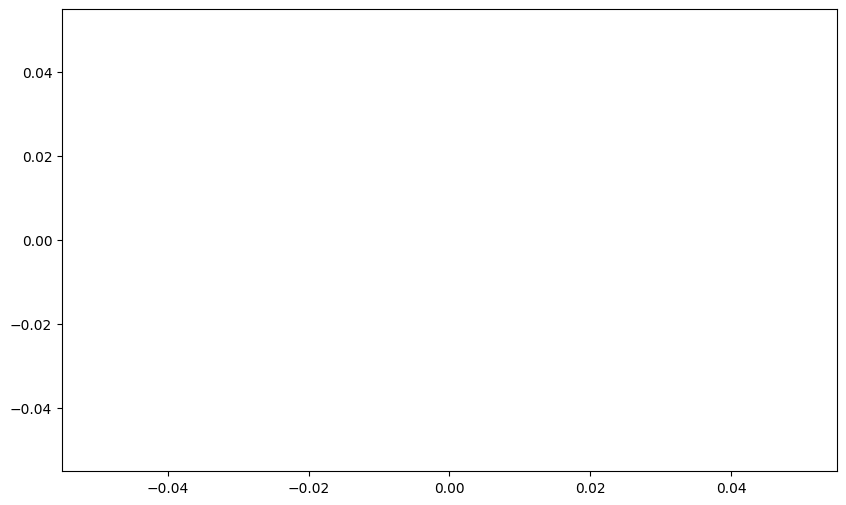

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Relationship between number of intersections and accuracy
intersection_accuracy = df.groupby("num_intersections")["is_correct"].mean()
plt.figure(figsize=(10, 6))
intersection_accuracy.plot(kind="bar")
plt.title("Accuracy vs Number of Intersections")
plt.xlabel("Number of Intersections")
plt.ylabel("Accuracy")
plt.show()

print("Accuracy by number of intersections:")
print(intersection_accuracy)
print("\n" + "=" * 50 + "\n")

# 2. Relationship between line thickness and accuracy
thickness_accuracy = df.groupby("line_thickness")["is_correct"].mean()
plt.figure(figsize=(10, 6))
thickness_accuracy.plot(kind="bar")
plt.title("Accuracy vs Line Thickness")
plt.xlabel("Line Thickness")
plt.ylabel("Accuracy")
plt.show()

print("Accuracy by line thickness:")
print(thickness_accuracy)
print("\n" + "=" * 50 + "\n")

# 3. Relationship between point distances and accuracy
for i in range(1, 4):
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=f"distance_point{i}", y="is_correct", data=df, lowess=True, scatter=False
    )
    plt.scatter(df[f"distance_point{i}"], df["is_correct"], alpha=0.1)
    plt.title(f"Accuracy vs Distance for Point {i}")
    plt.xlabel(f"Distance for Point {i}")
    plt.ylabel("Accuracy")
    plt.ylim(-0.05, 1.05)  # Set y-axis limits
    plt.show()

# 4. Interaction between number of intersections and line thickness
interaction_accuracy = (
    df.groupby(["num_intersections", "line_thickness"])["is_correct"].mean().unstack()
)
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_accuracy, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy: Intersection Count vs Line Thickness")
plt.xlabel("Line Thickness")
plt.ylabel("Number of Intersections")
plt.show()

print("Accuracy by intersection count and line thickness:")
print(interaction_accuracy)
print("\n" + "=" * 50 + "\n")

# 5. Average distance between points for correct vs incorrect predictions
df["avg_distance"] = (
    df["distance_point1"] + df["distance_point2"] + df["distance_point3"]
) / 3
avg_distance_by_correctness = df.groupby("is_correct")["avg_distance"].mean()
print("Average distance between points for correct vs incorrect predictions:")
print(avg_distance_by_correctness)

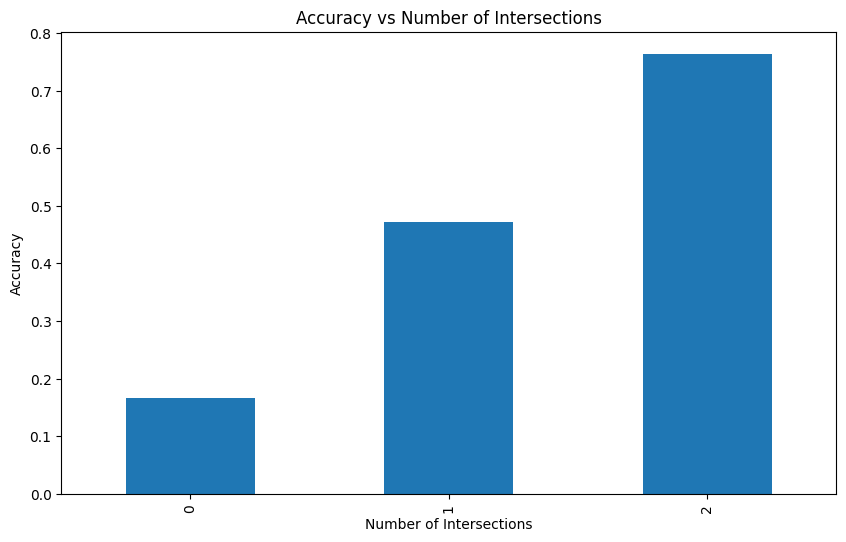

Accuracy by number of intersections:
num_intersections
0    0.166667
1    0.471264
2    0.763889
Name: is_correct, dtype: float64




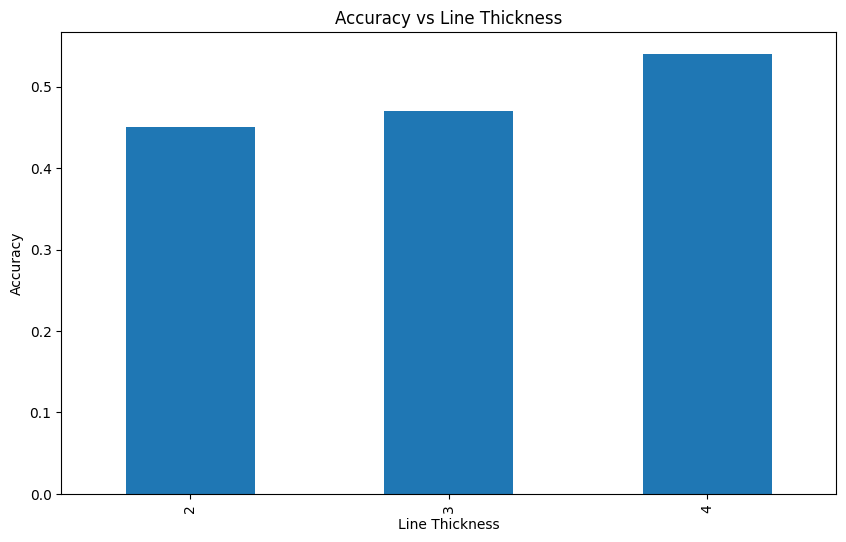

Accuracy by line thickness:
line_thickness
2    0.45
3    0.47
4    0.54
Name: is_correct, dtype: float64




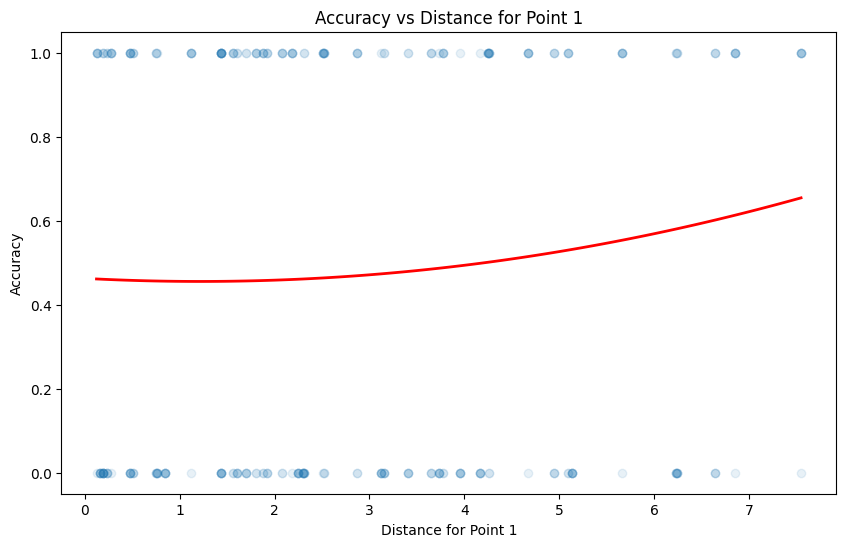

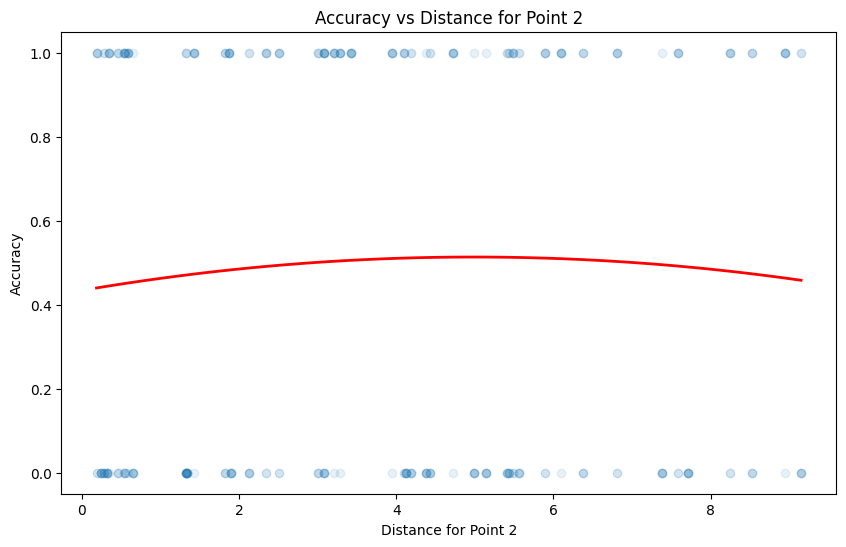

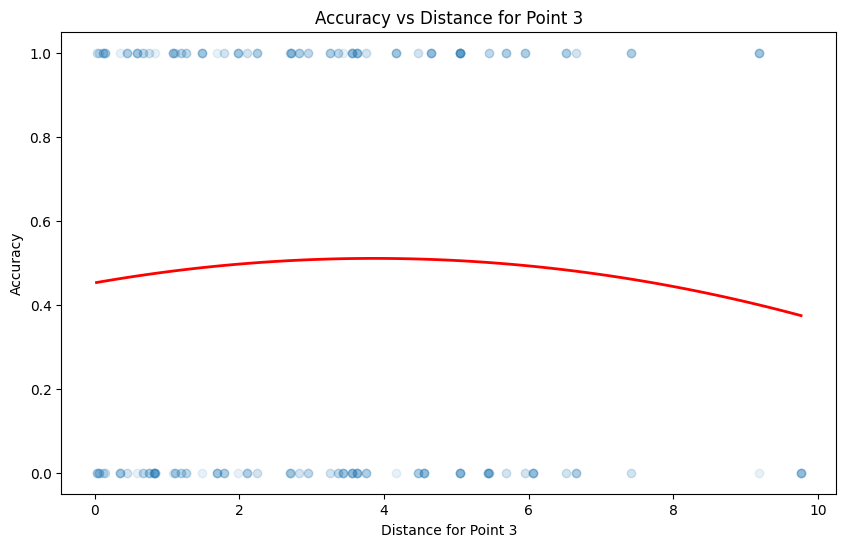

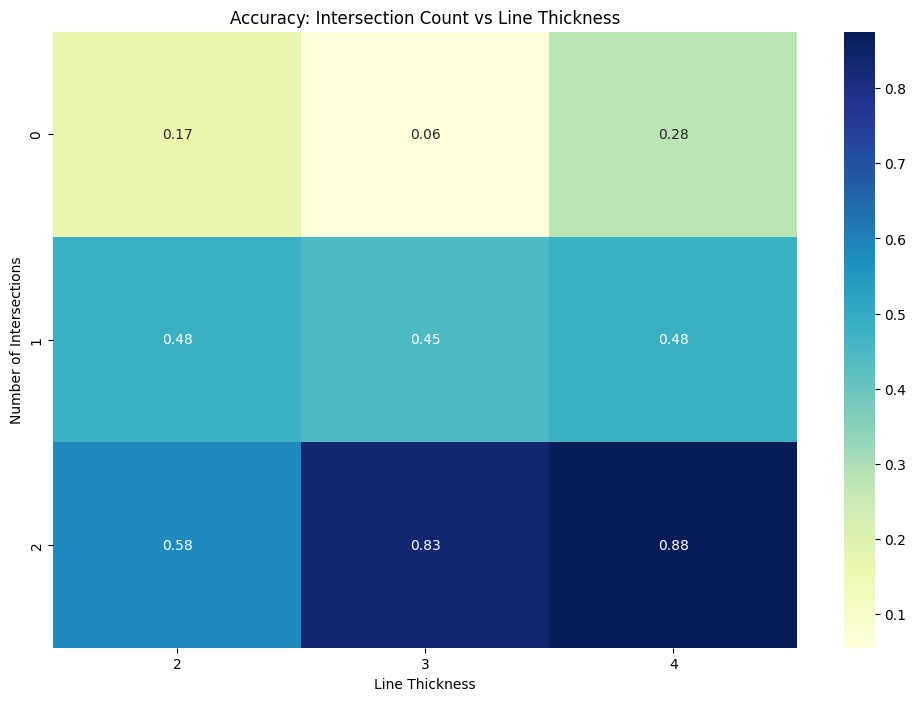

Accuracy by intersection count and line thickness:
line_thickness            2         3         4
num_intersections                              
0                  0.166667  0.055556  0.277778
1                  0.482759  0.448276  0.482759
2                  0.583333  0.833333  0.875000


Average distance between points for correct vs incorrect predictions:
is_correct
False    3.150568
True     3.298779
Name: avg_distance, dtype: float64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Relationship between number of intersections and accuracy
intersection_accuracy = df.groupby("num_intersections")["is_correct"].mean()
plt.figure(figsize=(10, 6))
intersection_accuracy.plot(kind="bar")
plt.title("Accuracy vs Number of Intersections")
plt.xlabel("Number of Intersections")
plt.ylabel("Accuracy")
plt.show()

print("Accuracy by number of intersections:")
print(intersection_accuracy)
print("\n" + "=" * 50 + "\n")

# 2. Relationship between line thickness and accuracy
thickness_accuracy = df.groupby("line_thickness")["is_correct"].mean()
plt.figure(figsize=(10, 6))
thickness_accuracy.plot(kind="bar")
plt.title("Accuracy vs Line Thickness")
plt.xlabel("Line Thickness")
plt.ylabel("Accuracy")
plt.show()

print("Accuracy by line thickness:")
print(thickness_accuracy)
print("\n" + "=" * 50 + "\n")

# 3. Relationship between point distances and accuracy
for i in range(1, 4):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[f"distance_point{i}"], df["is_correct"], alpha=0.1)

    # Fit a polynomial of degree 2
    z = np.polyfit(df[f"distance_point{i}"], df["is_correct"], 2)
    p = np.poly1d(z)

    # Plot the fitted polynomial
    x_range = np.linspace(
        df[f"distance_point{i}"].min(), df[f"distance_point{i}"].max(), 100
    )
    plt.plot(x_range, p(x_range), "r-", linewidth=2)

    plt.title(f"Accuracy vs Distance for Point {i}")
    plt.xlabel(f"Distance for Point {i}")
    plt.ylabel("Accuracy")
    plt.ylim(-0.05, 1.05)  # Set y-axis limits
    plt.show()

# 4. Interaction between number of intersections and line thickness
interaction_accuracy = (
    df.groupby(["num_intersections", "line_thickness"])["is_correct"].mean().unstack()
)
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_accuracy, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy: Intersection Count vs Line Thickness")
plt.xlabel("Line Thickness")
plt.ylabel("Number of Intersections")
plt.show()

print("Accuracy by intersection count and line thickness:")
print(interaction_accuracy)
print("\n" + "=" * 50 + "\n")

# 5. Average distance between points for correct vs incorrect predictions
df["avg_distance"] = (
    df["distance_point1"] + df["distance_point2"] + df["distance_point3"]
) / 3
avg_distance_by_correctness = df.groupby("is_correct")["avg_distance"].mean()
print("Average distance between points for correct vs incorrect predictions:")
print(avg_distance_by_correctness)

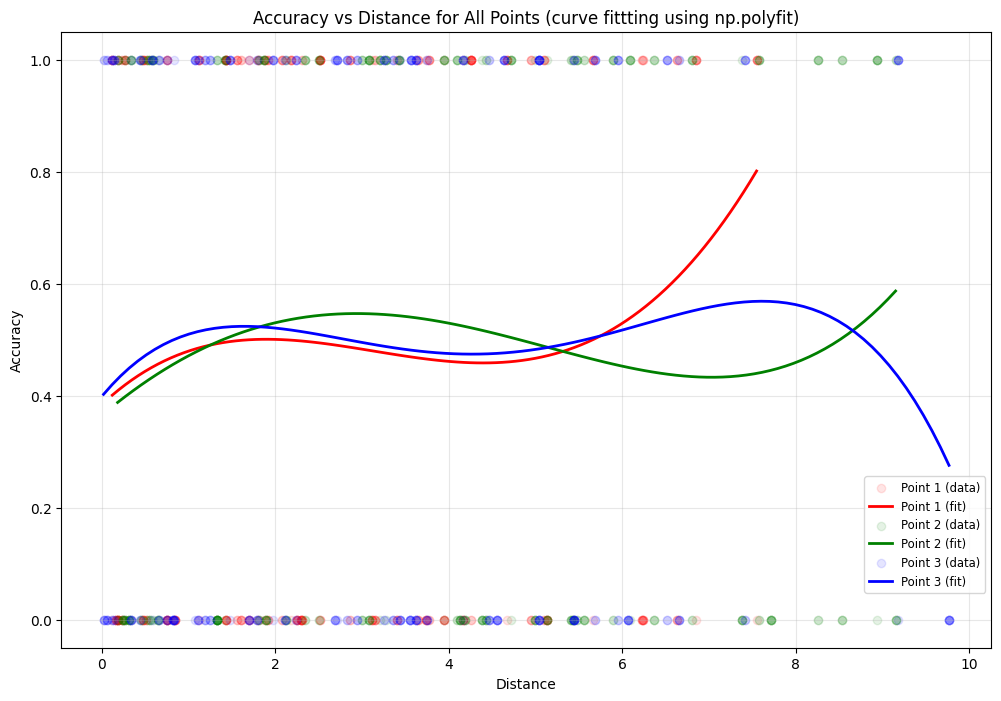

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (keep the previous code for intersections and line thickness analysis)

# 3. Relationship between point distances and accuracy (combined plot)
plt.figure(figsize=(12, 8))

colors = ["r", "g", "b"]
labels = ["Point 1", "Point 2", "Point 3"]

for i, color, label in zip(range(1, 4), colors, labels):
    # Scatter plot
    plt.scatter(
        df[f"distance_point{i}"],
        df["is_correct"],
        alpha=0.1,
        color=color,
        label=f"{label} (data)",
    )

    # Fit a polynomial of degree 2
    z = np.polyfit(df[f"distance_point{i}"], df["is_correct"], 4)
    p = np.poly1d(z)

    # Plot the fitted polynomial
    x_range = np.linspace(
        df[f"distance_point{i}"].min(), df[f"distance_point{i}"].max(), 100
    )
    plt.plot(x_range, p(x_range), color=color, linewidth=2, label=f"{label} (fit)")

plt.title("Accuracy vs Distance for All Points (curve fittting using np.polyfit)")
plt.xlabel("Distance")
plt.ylabel("Accuracy")
plt.ylim(-0.05, 1.05)  # Set y-axis limits
plt.legend(loc="lower right", fontsize="small", bbox_to_anchor=(1, 0.08))
plt.grid(True, alpha=0.3)
plt.show()

# ... (keep the rest of the code for interaction analysis and average distance)